# Fshion Mnist Dataset Artificial Neural Network using Pytorch

## Import Libraries

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [21]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Loading the Dataset

In [22]:
file_id = "1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(download_url)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


## Viewing the Random Image

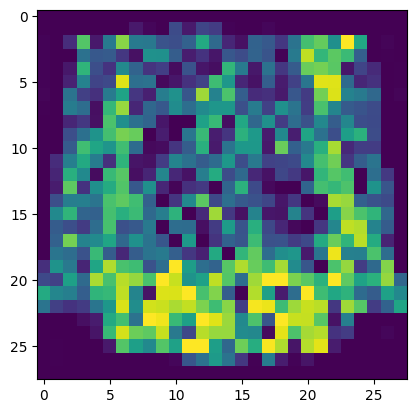

In [23]:
random_index = random.randint(0,len(df))
image = df.iloc[random_index,1:].values.reshape(28,28)
plt.imshow(image)
plt.show()

## Splitting the Dataset into Training and Testing Sets

In [24]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
np.max(X_train)

np.float64(1.0)

## Crating Custom Dataset Class

In [28]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [29]:
train_datataset = CustomDataset(features=X_train, labels=y_train)
test_datataset = CustomDataset(features=X_test, labels=y_test)

In [30]:
train_dataloader = DataLoader(train_datataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_datataset, batch_size=32, shuffle=False)

## Model Building, Training and Evaluation

In [31]:
# crating model Class
class Model(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self, features):
        return self.model(features)

In [32]:
learning_rate=0.1
epochs=100

In [33]:
# creatind model object of Mode Class we creates above
model = Model(num_features=X_train.shape[1])

# loss function
loss_function = nn.CrossEntropyLoss()

# optimizer 
optimizer = optim.SGD(params=model.parameters(), lr=learning_rate)

In [34]:
# training loop
for epoch in range(epochs):

    total_epoch_loss=0
    for batch_features, batch_labels in train_dataloader:

        # forward pass
        y_pred = model(batch_features)
        
        # loss calculate
        loss = loss_function(y_pred, batch_labels)
        
        # clear gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update gradients
        optimizer.step()

        # calculate loss for each batchs
        total_epoch_loss += loss.item()

    # average loss of batches
    avg_loss = total_epoch_loss/len(train_dataloader)

    print(f"Epoch: {epoch + 1}, Loss:{avg_loss}")

Epoch: 1, Loss:1.3600665287176767
Epoch: 2, Loss:0.770248862306277
Epoch: 3, Loss:0.6464937961101532
Epoch: 4, Loss:0.5933972660700481
Epoch: 5, Loss:0.536981070637703
Epoch: 6, Loss:0.5017959630489349
Epoch: 7, Loss:0.46118558088938394
Epoch: 8, Loss:0.44860423743724825
Epoch: 9, Loss:0.4262747430801392
Epoch: 10, Loss:0.4075276918709278
Epoch: 11, Loss:0.37780127321680385
Epoch: 12, Loss:0.36324996039271357
Epoch: 13, Loss:0.34713609819610913
Epoch: 14, Loss:0.330675822297732
Epoch: 15, Loss:0.32383295878767965
Epoch: 16, Loss:0.296322560608387
Epoch: 17, Loss:0.3003868658840656
Epoch: 18, Loss:0.2975336277484894
Epoch: 19, Loss:0.28200364351272583
Epoch: 20, Loss:0.2677786110341549
Epoch: 21, Loss:0.2611602423340082
Epoch: 22, Loss:0.2601346505930026
Epoch: 23, Loss:0.23329814709722996
Epoch: 24, Loss:0.2246642402311166
Epoch: 25, Loss:0.22120035494367282
Epoch: 26, Loss:0.21663345399002235
Epoch: 27, Loss:0.2056131911277771
Epoch: 28, Loss:0.19902097636212907
Epoch: 29, Loss:0.2028

In [35]:
# setting model to evaluation mode
model.eval()

Model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation code
total = 0 
correct = 0
with torch.no_grad():

    for batch_features, batch_labels in test_dataloader:

        y_pred = model(batch_features)

        _, predicted = torch.max(y_pred, 1)

        total += batch_labels.shape[0]

        correct += (predicted==batch_labels).sum().item()

print(f"Accuracy on Test Data: {(correct/total)*100}%")

Accuracy: 84.25%


In [37]:
# evaluation code
total = 0 
correct = 0
with torch.no_grad():

    for batch_features, batch_labels in train_dataloader:

        y_pred = model(batch_features)

        _, predicted = torch.max(y_pred, 1)

        total += batch_labels.shape[0]

        correct += (predicted==batch_labels).sum().item()

print(f"Accuracy on Train Data: {(correct/total)*100}%")

Accuracy on Train Data: 99.95833333333334%
